In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

%config InlineBackend.figure_format = 'retina' # 폰트를 선명하게~

C:\Users\minir\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
result=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\주소포함_전체정리.csv")

C:\Users\minir\AppData\Local\Temp\ipykernel_1820\1051183320.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\주소포함_전체정리.csv")


In [3]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RECV_DEPT_NM   415070 non-null  object 
 1   RECV_CPLT_DM   415070 non-null  object 
 2   NPA_CL         415070 non-null  int64  
 3   EVT_STAT_CD    415070 non-null  int64  
 4   EVT_CL_CD      415070 non-null  int64  
 5   RPTER_SEX      415070 non-null  object 
 6   HPPN_PNU_ADDR  415070 non-null  object 
 7   HPPN_X         415053 non-null  float64
 8   HPPN_Y         415053 non-null  float64
 9   SME_EVT_YN     136673 non-null  object 
 10  요일             415070 non-null  object 
 11  구분             415070 non-null  object 
 12  시/군/구          415070 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 41.2+ MB


In [4]:
result.head()

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구


In [5]:
result.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [6]:
result.head(20)

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구
5,충남청,2020-01-01 00:21:54,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동
6,충남청,2020-01-01 00:29:48,19,10,403,1,충청남도 천안시 동남구 목천읍 삼성리(목천읍) 203-19,127.170556,36.762500,NaN,Wednesday,충남,천안시
7,충남청,2020-01-01 00:32:03,19,10,406,1,충청남도 서산시 읍내동(행정:부춘동) 585-1,126.444094,36.786189,NaN,Wednesday,충남,서산시
8,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday,대전,서구
9,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday,대전,유성구


In [7]:
# del result["주소포함인덱스"]

In [8]:
# del result["제공자료인덱스"]

In [9]:
# del result["index"]

In [10]:
result.info() # 동일사건여부 결측치 처리 논의 필요 /  아예 삭제해도 될 듯?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415070 entries, 0 to 415069
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   접수부서코드  415070 non-null  object 
 1   접수완료일시  415070 non-null  object 
 2   경찰청구분   415070 non-null  int64  
 3   사건상태코드  415070 non-null  int64  
 4   사건종별코드  415070 non-null  int64  
 5   신고성별    415070 non-null  object 
 6   발생지점    415070 non-null  object 
 7   발생좌표x   415053 non-null  float64
 8   발생좌표y   415053 non-null  float64
 9   동일사건여부  136673 non-null  object 
 10  요일      415070 non-null  object 
 11  구분      415070 non-null  object 
 12  시/군/구   415070 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 41.2+ MB


In [11]:
# result2=result[(result["사건종별코드"]==403) | (result["사건종별코드"]== 406) |(result["사건종별코드"]== 402)|(result["사건종별코드"]== 401)|(result["사건종별코드"]== 404)|(result["사건종별코드"]== 405)]

In [12]:
# result.head()
result.tail()

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구
415065,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,중구
415066,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,당진시
415067,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,당진시
415068,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,서구
415069,충남청,2023-01-18 23:59:40,19,10,406,1.0,충청남도 아산시 모종동 (온양3동 ) 661,127.019848,36.778266,NaN,Wednesday,충남,아산시


In [13]:
# 총 발생건수 : 415,070
# 20~23 년도 교통 관련 사건 발생 건수

print("교통사고 발생건수 :",len(result[result["사건종별코드"]==401]))
print("교통불편 발생건수 :",len(result[result["사건종별코드"]==402]))
print("교통위반 발생건수 :",len(result[result["사건종별코드"]==403]))
print("사망,대형사고 발생건수 :",len(result[result["사건종별코드"]==404]))
print("인피도주 발생건수 :",len(result[result["사건종별코드"]==405]))
print("음주운전 발생건수 :",len(result[result["사건종별코드"]==406]))

교통사고 발생건수 : 255225
교통불편 발생건수 : 58505
교통위반 발생건수 : 33519
사망,대형사고 발생건수 : 21
인피도주 발생건수 : 45
음주운전 발생건수 : 67755


In [14]:
result401=len(result[result["사건종별코드"]==401])
result402=len(result[result["사건종별코드"]==402])
result403=len(result[result["사건종별코드"]==403])
result404=len(result[result["사건종별코드"]==404])
result405=len(result[result["사건종별코드"]==405])
result406=len(result[result["사건종별코드"]==406])

In [15]:
result_list=[["교통사고",result401],["교통불편",result402],["교통위반",result403],["사망,대형사고",result404],["인피도주",result405],
        ["음주운전",result406]]

In [16]:
resultdf=pd.DataFrame(result_list, columns=["종류","발생건수"])
resultdf=resultdf.set_index("종류")

Text(0.5, 1.0, '<20~23년도 사건 종류별 발생건수>')

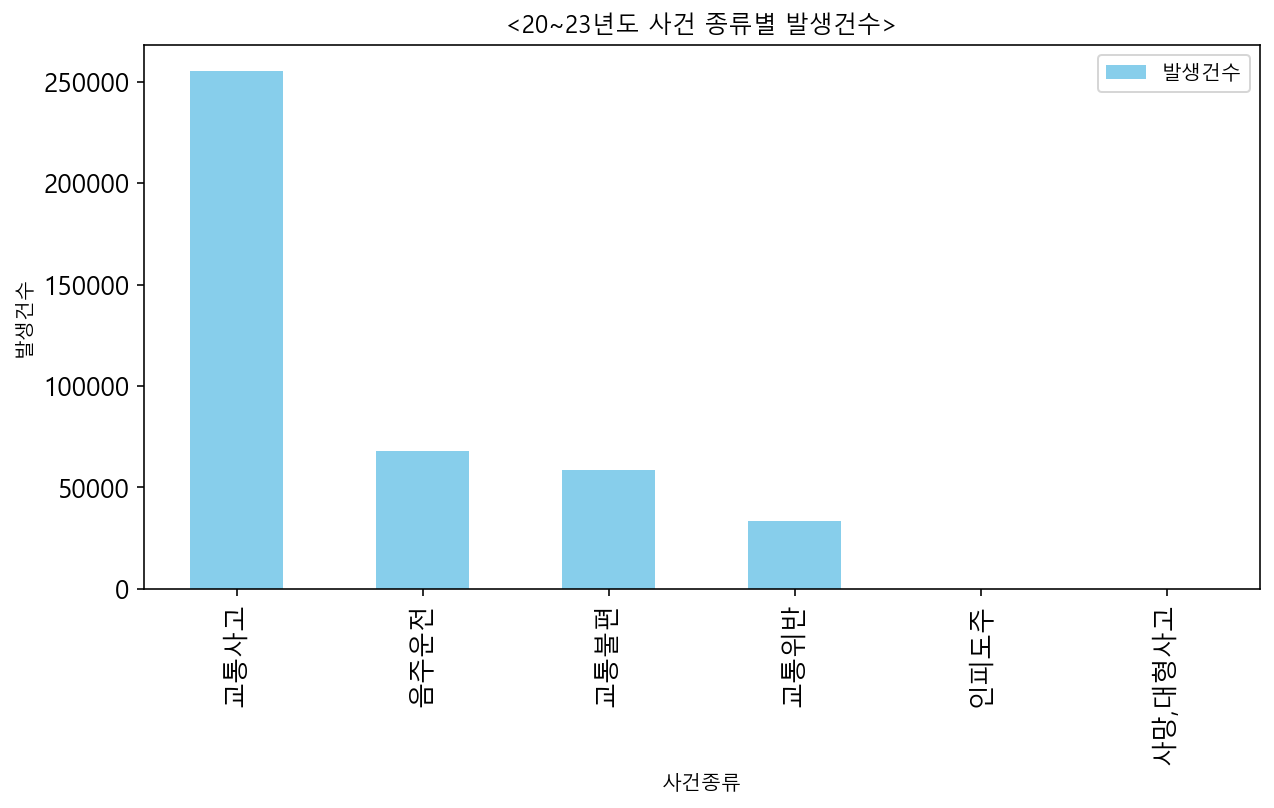

In [17]:
resultdf=resultdf.sort_values("발생건수", ascending=False)

resultdf.plot(kind="bar", figsize=(10,5), color="Skyblue", fontsize=13)
plt.xlabel("사건종류")
plt.ylabel("발생건수")
plt.title("<20~23년도 사건 종류별 발생건수>")

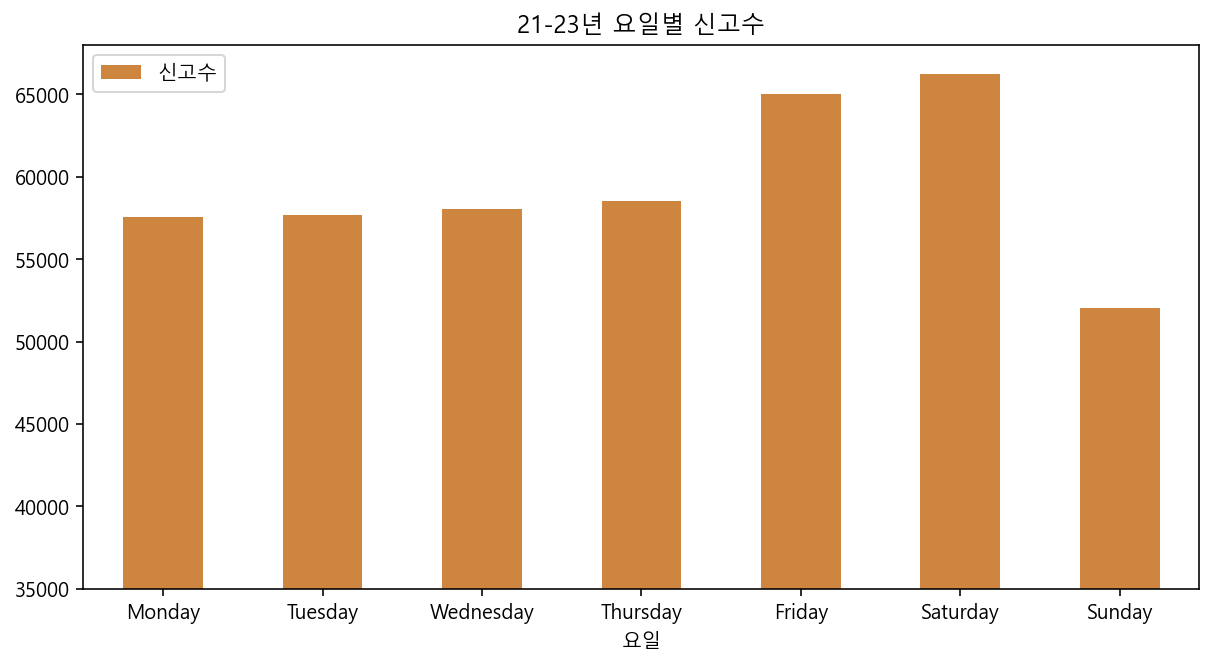

In [18]:
day=pd.DataFrame(result.groupby("요일").size())
day.columns=["신고수"]
day=day.iloc[[1,5,6,4,0,2,3]]

day.plot(kind="bar", figsize=(10,5), color="peru")
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.title("21-23년 요일별 신고수")
plt.ylim(35000,68000)
plt.grid(False)

In [19]:
result

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415065,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,중구
415066,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,당진시
415067,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,당진시
415068,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,서구


In [20]:
mon=result[(result["요일"]=="Monday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]
tue=result[(result["요일"]=="Tuesday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]
wed=result[(result["요일"]=="Wednesday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]
thr=result[(result["요일"]=="Thursday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]
fri=result[(result["요일"]=="Friday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]
sat=result[(result["요일"]=="Saturday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]
sun=result[(result["요일"]=="Sunday") & ((result["사건종별코드"]==401) |(result["사건종별코드"]==402)|(result["사건종별코드"]==403)|(result["사건종별코드"]==404)|(result["사건종별코드"]==405)|(result["사건종별코드"]==406))]

In [21]:
mon=mon[["요일","사건종별코드"]].sort_values("사건종별코드")
mon=mon.set_index("요일")

In [22]:
mondf=pd.DataFrame(mon.value_counts(), columns=["발생건수_월"])

In [23]:
mondf

,발생건수_월
사건종별코드,
401,38144
402,7707
406,7633
403,4075
404,7
405,4


In [24]:
tue=tue[["요일","사건종별코드"]].sort_values("사건종별코드")
tue=tue.set_index("요일")

tuedf=pd.DataFrame(tue.value_counts(), columns=["발생건수_화"])
tuedf

,발생건수_화
사건종별코드,
401,37243
406,8235
402,7934
403,4241
405,7
404,3


In [25]:
wed=wed[["요일","사건종별코드"]].sort_values("사건종별코드")
wed=wed.set_index("요일")

weddf=pd.DataFrame(wed.value_counts(), columns=["발생건수_수"])
weddf

,발생건수_수
사건종별코드,
401,36989
406,8422
402,8063
403,4534
405,8
404,1


In [26]:
thr=thr[["요일","사건종별코드"]].sort_values("사건종별코드")
thr=thr.set_index("요일")

thrdf=pd.DataFrame(thr.value_counts(), columns=["발생건수_목"])
thrdf

,발생건수_목
사건종별코드,
401,36779
406,8693
402,8321
403,4702
405,10


In [27]:
fri=fri[["요일","사건종별코드"]].sort_values("사건종별코드")
fri=fri.set_index("요일")

fridf=pd.DataFrame(fri.value_counts(), columns=["발생건수_금"])
fridf

,발생건수_금
사건종별코드,
401,40320
406,10284
402,9081
403,5330
405,7
404,3


In [28]:
sat=sat[["요일","사건종별코드"]].sort_values("사건종별코드")
sat=sat.set_index("요일")

satdf=pd.DataFrame(sat.value_counts(), columns=["발생건수_토"])
satdf

,발생건수_토
사건종별코드,
401,36815
406,12812
402,10633
403,5969
404,4
405,4


In [29]:
sun=sun[["요일","사건종별코드"]].sort_values("사건종별코드")
sun=sun.set_index("요일")

sundf=pd.DataFrame(sun.value_counts(), columns=["발생건수_일"])
sundf

,발생건수_일
사건종별코드,
401,28935
406,11676
402,6766
403,4668
405,5
404,3


In [30]:
w=pd.merge(mondf, tuedf,on="사건종별코드")

In [31]:
ww=pd.merge(w,weddf, on="사건종별코드")

In [32]:
www=pd.merge(ww,thrdf, on="사건종별코드")

In [33]:
wwww=pd.merge(www,fridf, on="사건종별코드")

In [34]:
wwwww=pd.merge(wwww, satdf, on="사건종별코드")

In [35]:
week=pd.merge(wwwww,sundf, on="사건종별코드")

In [36]:
week=week.reset_index()

In [37]:
week=week.replace({401:"교통사고",402:"교통불편",403:"교통위반",404:"사망,대형사고",405:"인피도주",406:"음주운전",})
week=week.set_index("사건종별코드")

<AxesSubplot:xlabel='사건종별코드'>

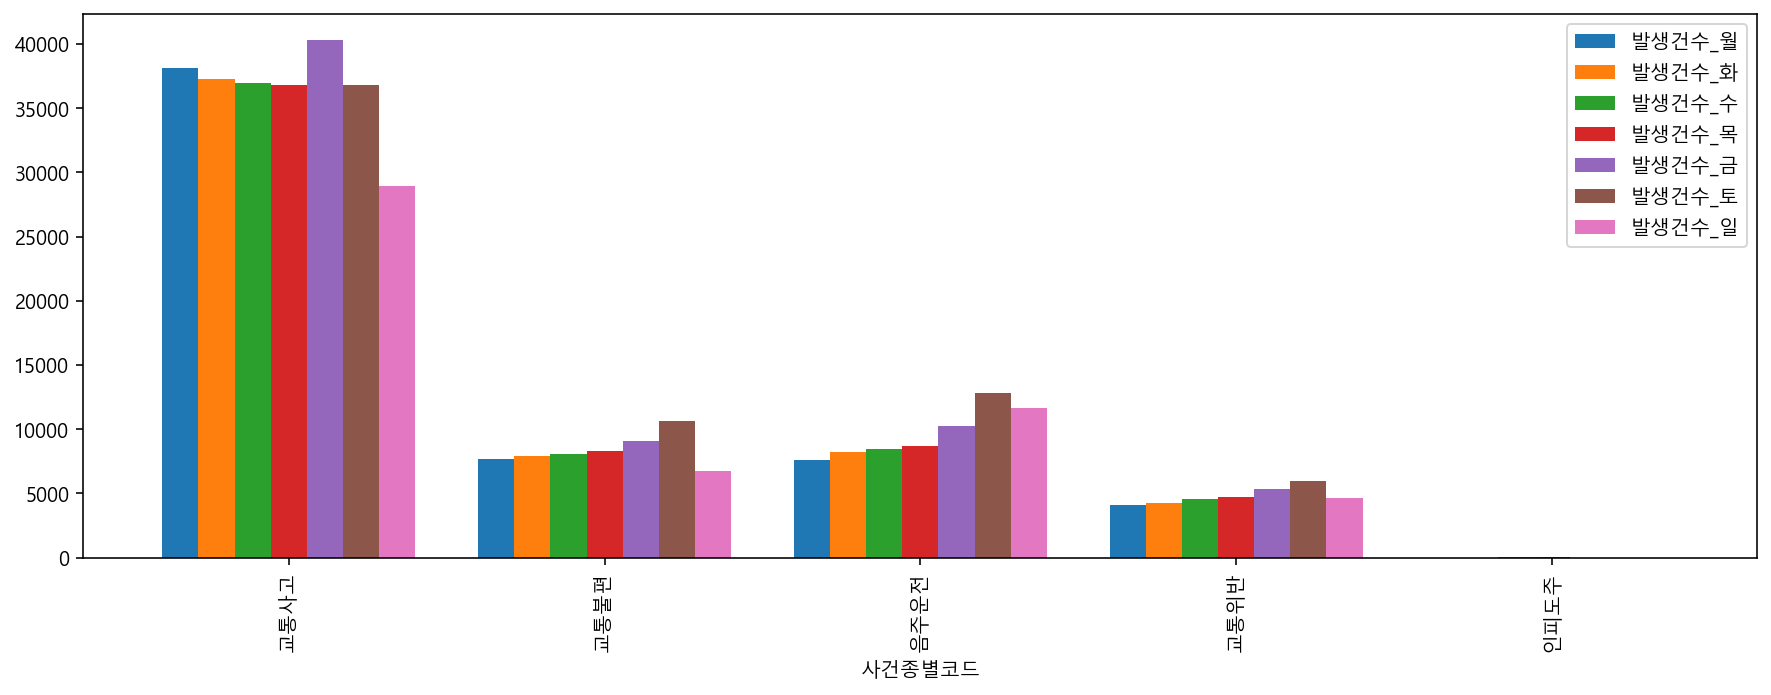

In [38]:
week.plot(kind="bar", figsize=(15,5), width=0.8)

In [39]:
result

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415065,대전청,2023-01-18 23:23:38,13,10,406,1.0,대전광역시 중구 문화동 (행정:문화1동 ) 1-266,127.414486,36.321280,Y,Wednesday,대전,중구
415066,충남청,2023-01-18 23:32:32,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741950,36.868136,Y,Wednesday,충남,당진시
415067,충남청,2023-01-18 23:34:30,19,10,401,1.0,충청남도 당진시 신평면 상오리(신평면 ) 910-6,126.741930,36.868214,Y,Wednesday,충남,당진시
415068,대전청,2023-01-18 23:35:52,13,10,406,2.0,대전광역시 서구 월평동 (월평1동 ) 1526,127.357785,36.355010,NaN,Wednesday,대전,서구


In [40]:
result["발생연도"]=result["접수완료일시"].str.split("-").apply(lambda x:x[0])

In [41]:
t20=len(result[result["발생연도"]=="2020"])
t21=len(result[result["발생연도"]=="2021"])
t22=len(result[result["발생연도"]=="2022"])

In [42]:
tist=[["20년",t20],["21년",t21],["22년",t22]]

tdf=pd.DataFrame(tist, columns=["연도","교통사고 건수"]).set_index("연도")

In [43]:
tdf

,교통사고 건수
연도,
20년,142538
21년,128025
22년,138442


<AxesSubplot:xlabel='연도'>

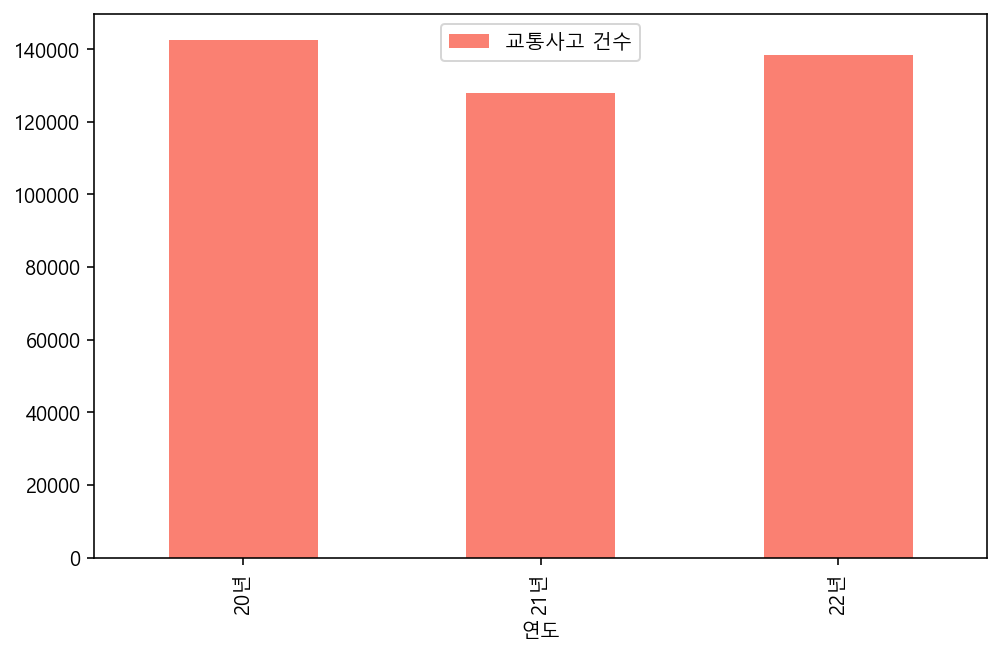

In [44]:
tdf.plot(kind="bar", figsize=(8,5), width=0.5, color="salmon")

In [45]:
kp20=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\data\\kp2020.csv")
kp21=pd.read_csv("C:\\Users\\minir\\OneDrive\\바탕 화면\\지치안\\data\\kp2021.csv")

In [46]:
kp20.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)
kp21.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별","HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)

In [47]:
kp20

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [48]:
len(kp20)

77077

In [49]:
kp21["발생연도"]=kp21["접수완료일시"].str.split("/").str[0]

In [50]:
t21=len(kp21[kp21["발생연도"]=="21"])

In [51]:
t22=len(kp21[kp21["발생연도"]=="22"])

In [52]:
t20=(len(kp20))

In [53]:
hppn_list=[["20년",t20],["21년",t21],["22년",t22]]
hppn=pd.DataFrame(hppn_list,columns=["연도","전체 사건 접수 건수"])

In [54]:
hppn=hppn.set_index("연도")

([<matplotlib.axis.XTick at 0x19712cff100>,
 [Text(0, 0, '20년'), Text(1, 0, '21년'), Text(2, 0, '22년')])

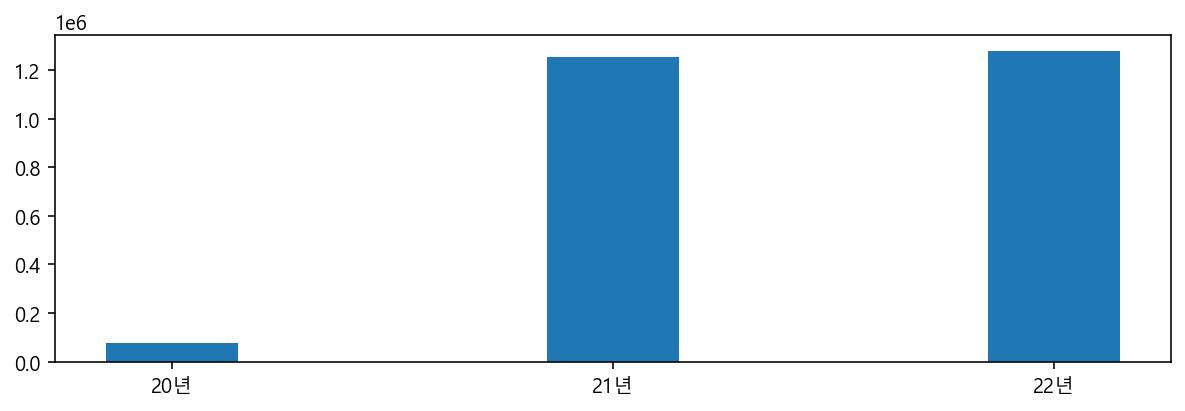

In [55]:
x = np.arange(3)
years = hppn.index
values = hppn["전체 사건 접수 건수"]

plt.figure(figsize=(10,3))
plt.bar(x, values, width=0.3)
plt.xticks(x, years)



In [56]:
hppn

,전체 사건 접수 건수
연도,
20년,77077
21년,1255326
22년,1279344


In [57]:
tdf

,교통사고 건수
연도,
20년,142538
21년,128025
22년,138442


In [58]:
df=pd.merge(hppn,tdf, on="연도") # 20자료를 뭔가 잘못 만진듯!....
df

,전체 사건 접수 건수,교통사고 건수
연도,,
20년,77077,142538
21년,1255326,128025
22년,1279344,138442


In [59]:
ndf=df[1:]

<AxesSubplot:xlabel='연도'>

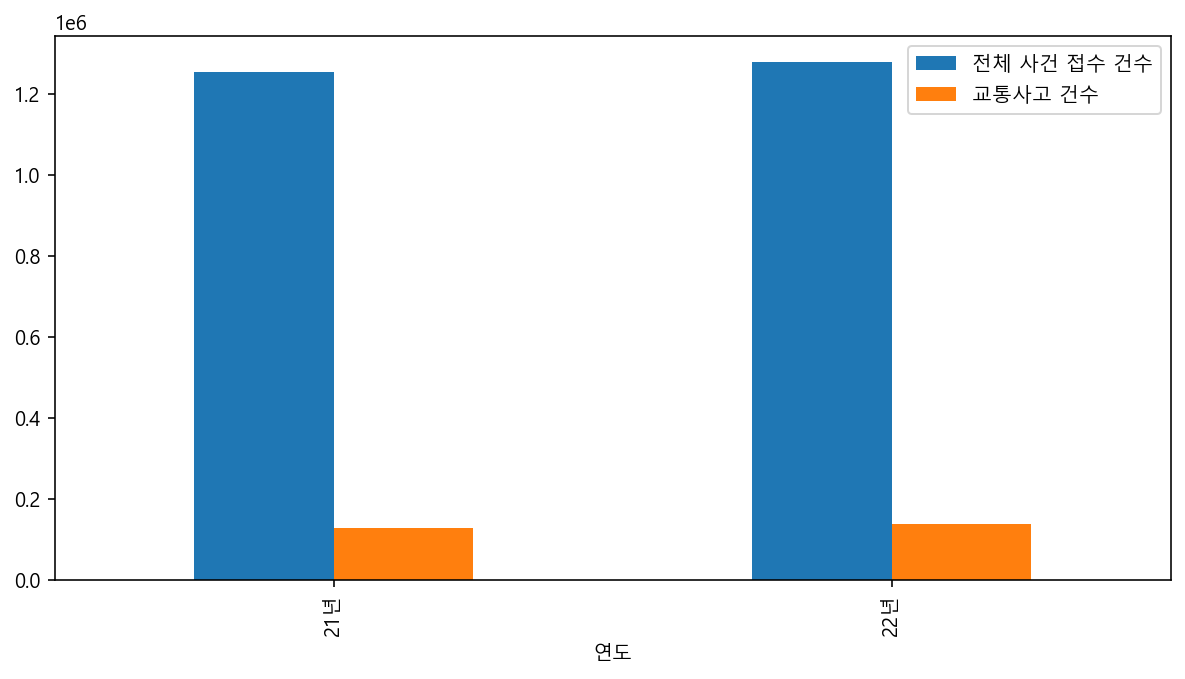

In [60]:
ndf.plot(kind="bar", figsize=(10,5))

In [61]:
result.head()

,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,구분,시/군/구,발생연도
0,충남청,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,Wednesday,충남,공주시,2020
1,충남청,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,NaN,Wednesday,충남,논산시,2020
2,충남청,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,Wednesday,세종,소담동,2020
3,충남청,2020-01-01 00:20:04,19,10,402,1,충청남도 천안시 서북구 불당동(불당동) 204-4,127.109667,36.815468,NaN,Wednesday,충남,천안시,2020
4,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,대전,유성구,2020


In [62]:
cn=result[result["구분"]=="충남"]
dj=result[result["구분"]=="대전"]
sj=result[result["구분"]=="세종"]

<AxesSubplot:xlabel='시/군/구'>

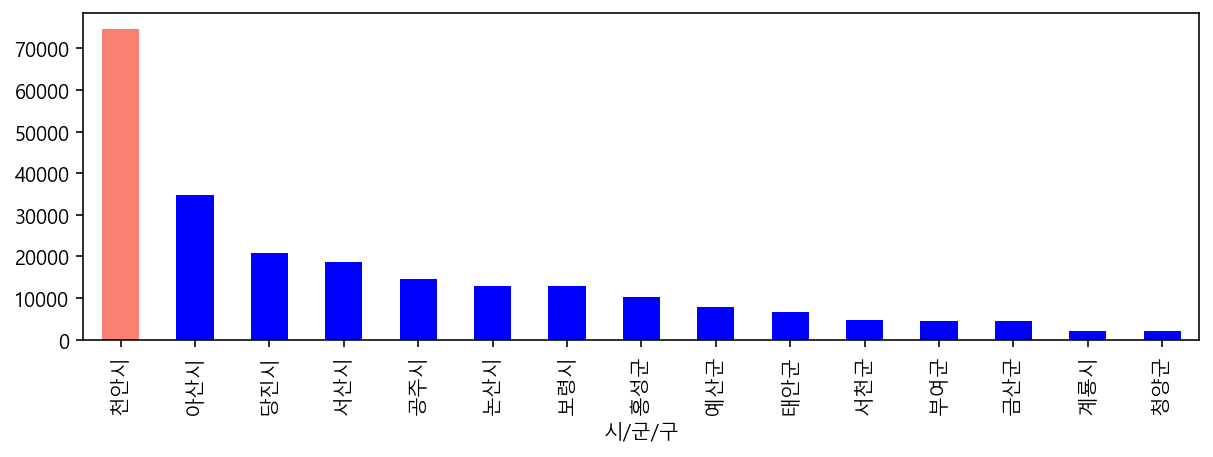

In [63]:
cn.value_counts("시/군/구").plot(kind="bar", figsize=(10,3), color=["salmon", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b", "b"])


In [64]:
cn.value_counts("시/군/구") 

시/군/구
천안시    74681
아산시    34823
당진시    20933
서산시    18589
공주시    14616
논산시    12941
보령시    12783
홍성군    10134
예산군     7820
태안군     6624
서천군     4605
부여군     4512
금산군     4499
계룡시     2133
청양군     2119
dtype: int64

<AxesSubplot:xlabel='시/군/구'>

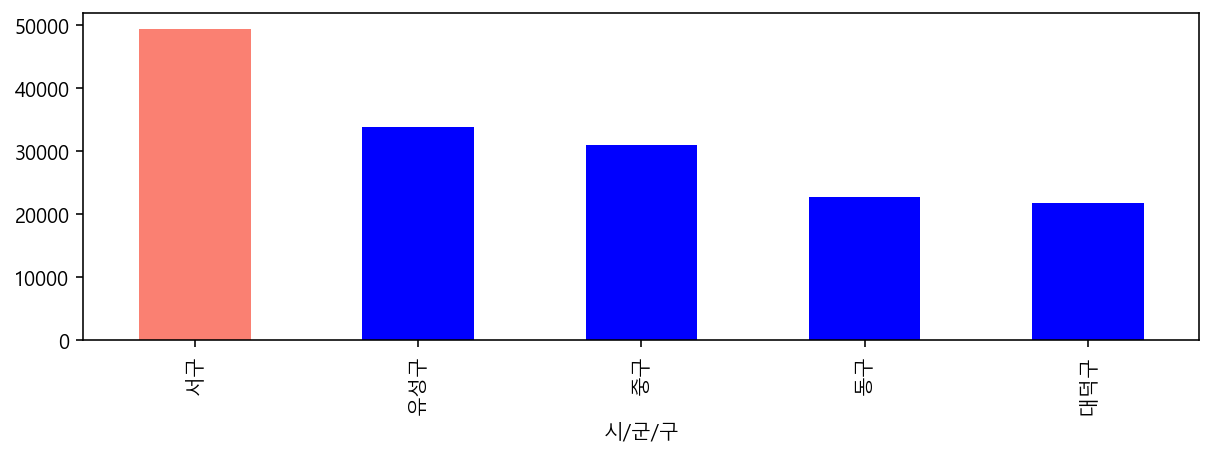

In [65]:
dj.value_counts("시/군/구").plot(kind="bar", figsize=(10,3), color=["salmon", "b", "b", "b", "b"])

In [66]:
dj.value_counts("시/군/구")  

시/군/구
서구     49338
유성구    33810
중구     30958
동구     22684
대덕구    21673
dtype: int64

<AxesSubplot:xlabel='시/군/구'>

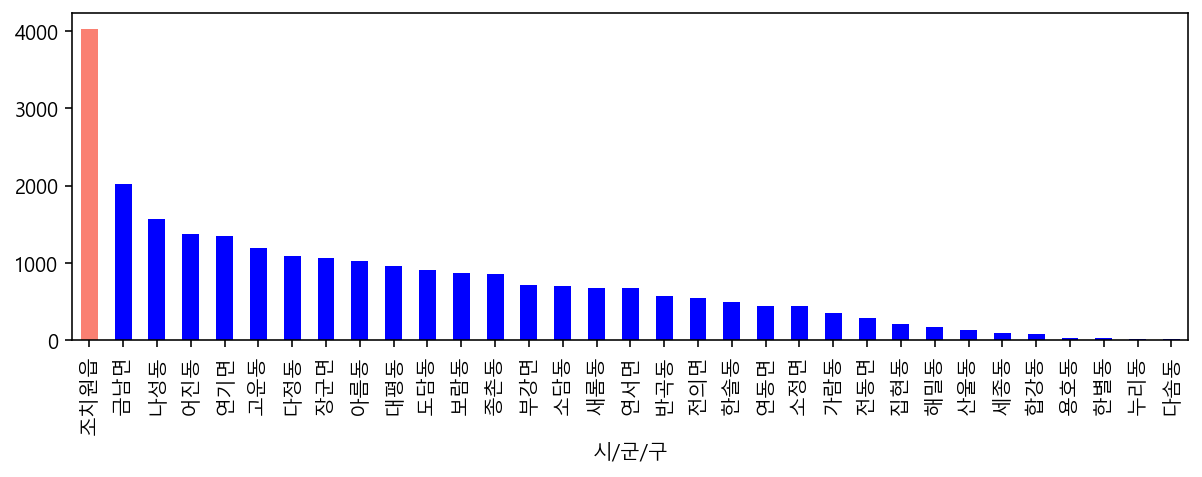

In [67]:
sj.value_counts("시/군/구").plot(kind="bar", figsize=(10,3), color=["salmon","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b","b"])

In [68]:
sj.value_counts("시/군/구")

시/군/구
조치원읍    4032
금남면     2020
나성동     1560
어진동     1368
연기면     1346
고운동     1195
다정동     1081
장군면     1055
아름동     1017
대평동      949
도담동      904
보람동      861
종촌동      850
부강면      713
소담동      698
새롬동      674
연서면      665
반곡동      572
전의면      545
한솔동      489
연동면      438
소정면      431
가람동      350
전동면      285
집현동      205
해밀동      159
산울동      129
세종동       85
합강동       74
용호동       21
한별동       15
누리동        7
다솜동        2
dtype: int64

In [69]:
hour1=result["접수완료일시"].str.split(" ").apply(lambda x:x[1])

In [70]:
result["시각"]=hour1.str.split(":").apply(lambda x:x[0])

In [71]:
cn=result[result["구분"]=="충남"]
dj=result[result["구분"]=="대전"]
sj=result[result["구분"]=="세종"]

In [72]:
cn=cn.replace({401:"교통사고",402:"교통불편",403:"교통위반",404:"사망,대형사고",405:"인피도주",406:"음주운전",})

In [73]:
dj=dj.replace({401:"교통사고",402:"교통불편",403:"교통위반",404:"사망,대형사고",405:"인피도주",406:"음주운전",})

In [74]:
sj=sj.replace({401:"교통사고",402:"교통불편",403:"교통위반",404:"사망,대형사고",405:"인피도주",406:"음주운전",})

In [75]:
c1=cn[cn["사건종별코드"]=="교통사고"]
c2=cn[cn["사건종별코드"]=="교통불편"]
c3=cn[cn["사건종별코드"]=="교통위반"]
c4=cn[cn["사건종별코드"]=="사망,대형사고"]
c5=cn[cn["사건종별코드"]=="인피도주"]
c6=cn[cn["사건종별코드"]=="음주운전"]

In [76]:
c1=pd.DataFrame(c1.value_counts("시각"), columns=["교통사고"])
c2=pd.DataFrame(c2.value_counts("시각"), columns=["교통불편"])
c3=pd.DataFrame(c3.value_counts("시각"), columns=["교통위반"])
c4=pd.DataFrame(c4.value_counts("시각"), columns=["사망,대형사고"])
c5=pd.DataFrame(c5.value_counts("시각"), columns=["인피도주"])
c6=pd.DataFrame(c6.value_counts("시각"), columns=["음주운전"])

In [77]:
print(len(c1))
print(len(c2))
print(len(c3))
print(len(c4)) # 사망 대형사고 1~5 건이기 때문에 삭제
print(len(c5)) # 인피도주 1~3 건이기 때문에 삭제
print(len(c6))

24
24
24
12
13
24


In [78]:
# c1~3, 6 merge
h=pd.merge(c1,c2, on="시각")
hh=pd.merge(h,c3, on="시각")
h4=pd.merge(hh,c6, on="시각")

In [79]:
h5

NameError: name 'h5' is not defined

In [ ]:
h5=h5.sort_values("시각")

In [ ]:
#충남 시간별 
h5

In [ ]:
h5.plot(kind="bar", figsize=(20,5), width=0.8)

In [ ]:
d1=dj[dj["사건종별코드"]=="교통사고"]
d2=dj[dj["사건종별코드"]=="교통불편"]
d3=dj[dj["사건종별코드"]=="교통위반"]
d4=dj[dj["사건종별코드"]=="사망,대형사고"]
d5=dj[dj["사건종별코드"]=="인피도주"]
d6=dj[dj["사건종별코드"]=="음주운전"]

In [ ]:
d1=pd.DataFrame(d1.value_counts("시각"), columns=["교통사고"])
d2=pd.DataFrame(d2.value_counts("시각"), columns=["교통불편"])
d3=pd.DataFrame(d3.value_counts("시각"), columns=["교통위반"])
d4=pd.DataFrame(d4.value_counts("시각"), columns=["사망,대형사고"])
d5=pd.DataFrame(d5.value_counts("시각"), columns=["인피도주"])
d6=pd.DataFrame(d6.value_counts("시각"), columns=["음주운전"])

In [ ]:
# merge 전 결측치 확인
print(len(d1))
print(len(d2))
print(len(d3))
print(len(d4)) # 삭제
print(len(d5)) # 삭제
print(len(d6))

In [ ]:
#  d1~3, 6 merge
z=pd.merge(d1,d2, on="시각")
zz=pd.merge(z,d3, on="시각")
zzz=pd.merge(zz,d6, on="시각")

In [ ]:
zzz

In [ ]:
z3=zzz.sort_values("시각")

In [ ]:
z3

In [ ]:
z3.plot(kind="bar", figsize=(20,5), width=0.8)

In [ ]:
s1=sj[sj["사건종별코드"]=="교통사고"]
s2=sj[sj["사건종별코드"]=="교통불편"]
s3=sj[sj["사건종별코드"]=="교통위반"]
s4=sj[sj["사건종별코드"]=="사망,대형사고"]
s5=sj[sj["사건종별코드"]=="인피도주"]
s6=sj[sj["사건종별코드"]=="음주운전"]

s1=pd.DataFrame(s1.value_counts("시각"), columns=["교통사고"])
s2=pd.DataFrame(s2.value_counts("시각"), columns=["교통불편"])
s3=pd.DataFrame(s3.value_counts("시각"), columns=["교통위반"])
s4=pd.DataFrame(s4.value_counts("시각"), columns=["사망,대형사고"])
s5=pd.DataFrame(s5.value_counts("시각"), columns=["인피도주"])
s6=pd.DataFrame(s6.value_counts("시각"), columns=["음주운전"])

In [ ]:
# merge 전 결측치 확인
print(len(s1))
print(len(s2))
print(len(s3))
print(len(s4)) # 삭제
print(len(s5)) # 삭제
print(len(s6))

In [ ]:
#  d1~3, 6 merge
j=pd.merge(s1,s2, on="시각")
j2=pd.merge(j,s3, on="시각")
j3=pd.merge(j2,d6, on="시각")

In [ ]:
j3=j3.sort_values("시각")

In [ ]:
j3

In [ ]:
j3.plot(kind="bar", figsize=(20,5), width=0.8)